In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def predict(model, X):
  W, b = model['W'], model['b']
  yhat = np.dot(X, W) + b
  return yhat

def cost_function(y, yhat, num_examples):
  return (1/num_examples) * np.sum((y - yhat)**2) 

def linear_regression(X, y, lr, iters):
  num_examples = len(X)
  
  # Initialize W, b
  W = np.zeros((X.shape[1], 1))
  b = 0
  model = {'W': W, 'b': b}

  cost_history = []
  for i in range(iters):
    # forward prop
    yhat = predict(model, X)
    cost = cost_function(y, yhat, num_examples)
    cost_history.append(cost)

    # backward prop
    dW = (2/num_examples) * np.dot(X.T, (yhat - y))
    db = np.sum((2/num_examples) * (yhat - y), axis=0, keepdims=False)
    W -= lr * dW
    b -= lr * db

    model = {'W': W, 'b': b}

    if i % 100 == 0:
      print('current iter: ' + str(i) + ' current cost: ' + str(cost))
  return model, cost_history

In [7]:
# generate dataset
import sklearn.datasets
X, y = sklearn.datasets.make_regression(200, 5, noise=30)
y = y.reshape(200, 1)

model, cost_history = linear_regression(X, y, lr=0.005, iters=1000)

current iter: 0 current cost: 23137.54892263812
current iter: 100 current cost: 3668.570631717392
current iter: 200 current cost: 1225.2386236343498
current iter: 300 current cost: 892.3802305605375
current iter: 400 current cost: 843.2148227837371
current iter: 500 current cost: 835.4224896632476
current iter: 600 current cost: 834.1172897880552
current iter: 700 current cost: 833.8897055063354
current iter: 800 current cost: 833.8488930503019
current iter: 900 current cost: 833.8414306607161


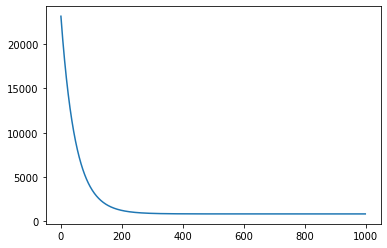

In [8]:
plt.plot(cost_history)